<a href="https://colab.research.google.com/github/vaibhavlokunde/AI-ML/blob/main/HousePricePredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import sklearn
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#dropna drops all the nan values
df=pd.read_csv("houseprice.csv",usecols=["SalePrice","MSSubClass","MSZoning","LotFrontage","LotArea","Street","YearBuilt","LotShape","1stFlrSF","2ndFlrSF"]).dropna()

In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [4]:
df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
1455,60,RL,62.0,7917,Pave,Reg,1999,953,694,175000
1456,20,RL,85.0,13175,Pave,Reg,1978,2073,0,210000
1457,70,RL,66.0,9042,Pave,Reg,1941,1188,1152,266500
1458,20,RL,68.0,9717,Pave,Reg,1950,1078,0,142125
1459,20,RL,75.0,9937,Pave,Reg,1965,1256,0,147500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [6]:
import datetime
datetime.datetime.now().year

2025

In [7]:
df['Total Years']=datetime.datetime.now().year-df['YearBuilt']

In [8]:
df.drop('YearBuilt',axis=1,inplace=True)

#We added a new column which calculates the total years and dropped the year built column cuz it was of no use

In [9]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,856,854,208500,22
1,20,RL,80.0,9600,Pave,Reg,1262,0,181500,49
2,60,RL,68.0,11250,Pave,IR1,920,866,223500,24
3,70,RL,60.0,9550,Pave,IR1,961,756,140000,110
4,60,RL,84.0,14260,Pave,IR1,1145,1053,250000,25


In [10]:
#Create Categorical features
cat_features=["MSSubClass","MSZoning","Street","LotShape"]
out_features="SalePrice"

#We categorized the data so that instead of having large values we can have short integer values to sort them or classify them

In [11]:
from sklearn.preprocessing import LabelEncoder

lbl_encoders={}
for feature in cat_features:
  lbl_encoders[feature]=LabelEncoder()
  df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [12]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,22
1,0,3,80.0,9600,1,3,1262,0,181500,49
2,5,3,68.0,11250,1,0,920,866,223500,24
3,6,3,60.0,9550,1,0,961,756,140000,110
4,5,3,84.0,14260,1,0,1145,1053,250000,25


In [13]:
##Stacking and converting the categorical features into tensors
cat_features=np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [14]:
#Categorical feature should never be converted to float...always integer
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [15]:
#Create continuous features
cont_features=[]
for i in df.columns:
  if i in ["MSSubClass","MSZoning","Street","LotShape","SalePrice"]:
    pass
  else:
    cont_features.append(i)

In [16]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [17]:
cont_values=np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    22.],
        [   80.,  9600.,  1262.,     0.,    49.],
        [   68., 11250.,   920.,   866.,    24.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    84.],
        [   68.,  9717.,  1078.,     0.,    75.],
        [   75.,  9937.,  1256.,     0.,    60.]])

In [18]:
#Dependent Features
y=torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [19]:
cat_dims=[len(df[col].unique()) for col in ["MSSubClass","MSZoning","Street","LotShape"]]

In [20]:
cat_dims

[15, 5, 2, 4]

#Output dimension should be setbased on the input dimension (min(50,feature dimesnion/2))

In [21]:
embedding_dim=[(x,min(50,(x+1)//2)) for x in cat_dims]

In [22]:
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [24]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [25]:
cat_featuresz=cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [26]:
pd.set_option('display.max_rows',500)
embedding_val=[]
for i,e in enumerate(embed_representation):
  embedding_val.append(e(cat_features[:,i]))

In [27]:
embedding_val

[tensor([[ 0.5116,  0.2869,  0.8437,  ...,  0.6318, -2.9776,  1.1534],
         [ 0.6911, -0.5704,  0.6676,  ..., -0.7607, -0.9631,  0.4086],
         [ 0.5116,  0.2869,  0.8437,  ...,  0.6318, -2.9776,  1.1534],
         ...,
         [ 0.2575,  0.0254,  0.8121,  ...,  0.3809, -0.3144,  0.7215],
         [ 0.6911, -0.5704,  0.6676,  ..., -0.7607, -0.9631,  0.4086],
         [ 0.6911, -0.5704,  0.6676,  ..., -0.7607, -0.9631,  0.4086]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[-0.0574,  0.2216, -0.8837],
         [-0.0574,  0.2216, -0.8837],
         [-0.0574,  0.2216, -0.8837],
         ...,
         [-0.0574,  0.2216, -0.8837],
         [-0.0574,  0.2216, -0.8837],
         [-0.0574,  0.2216, -0.8837]], grad_fn=<EmbeddingBackward0>),
 tensor([[1.2775],
         [1.2775],
         [1.2775],
         ...,
         [1.2775],
         [1.2775],
         [1.2775]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 2.3199, -0.5265],
         [ 2.3199, -0.5265],
         [-1.3047, -1.7573],

In [28]:
z=torch.cat(embedding_val,1)
z

tensor([[ 0.5116,  0.2869,  0.8437,  ...,  1.2775,  2.3199, -0.5265],
        [ 0.6911, -0.5704,  0.6676,  ...,  1.2775,  2.3199, -0.5265],
        [ 0.5116,  0.2869,  0.8437,  ...,  1.2775, -1.3047, -1.7573],
        ...,
        [ 0.2575,  0.0254,  0.8121,  ...,  1.2775,  2.3199, -0.5265],
        [ 0.6911, -0.5704,  0.6676,  ...,  1.2775,  2.3199, -0.5265],
        [ 0.6911, -0.5704,  0.6676,  ...,  1.2775,  2.3199, -0.5265]],
       grad_fn=<CatBackward0>)

In [29]:
dropout=nn.Dropout(0.4)

In [30]:
final_embed=dropout(z)
final_embed

tensor([[ 0.8527,  0.4782,  0.0000,  ...,  2.1291,  3.8665, -0.8776],
        [ 0.0000, -0.9506,  1.1126,  ...,  2.1291,  3.8665, -0.8776],
        [ 0.0000,  0.0000,  1.4061,  ...,  2.1291, -2.1745, -2.9289],
        ...,
        [ 0.4292,  0.0000,  1.3535,  ...,  0.0000,  3.8665, -0.0000],
        [ 1.1519, -0.0000,  0.0000,  ...,  2.1291,  3.8665, -0.8776],
        [ 0.0000, -0.0000,  1.1126,  ...,  2.1291,  3.8665, -0.8776]],
       grad_fn=<MulBackward0>)

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):
  def __init__(self,embedding_dim,n_cont,out_sz,layers,p=0.5):
    super().__init__()
    self.embeds=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
    self.emb_drop=nn.Dropout(p)
    self.bn_cont=nn.BatchNorm1d(n_cont)

    layerlist=[]
    n_emb=sum((out for inp,out in embedding_dim))
    n_in=n_emb+n_cont

    for i in layers:
      layerlist.append(nn.Linear(n_in,i))
      layerlist.append(nn.ReLU(inplace=True))
      layerlist.append(nn.BatchNorm1d(i))
      layerlist.append(nn.Dropout(p))
      n_in=i
    layerlist.append(nn.Linear(layers[-1],out_sz))

    self.layers=nn.Sequential(*layerlist)

  def forward(self,x_cat,x_cont):
    embeddings=[]
    for i,e in enumerate(self.embeds):
      embeddings.append(e(x_cat[:,i]))
    x=torch.cat(embeddings,1)
    x=self.emb_drop(x)

    x_cont=self.bn_cont(x_cont)
    x=torch.cat([x,x_cont],1)
    x=self.layers(x)
    return x

In [32]:
len(cont_features)

5

In [33]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [34]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [35]:
loss_fn=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [36]:
df.shape

(1201, 10)

In [37]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    22.],
        [   80.,  9600.,  1262.,     0.,    49.],
        [   68., 11250.,   920.,   866.,    24.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    84.],
        [   68.,  9717.,  1078.,     0.,    75.],
        [   75.,  9937.,  1256.,     0.,    60.]])

In [38]:
cont_values.shape

torch.Size([1201, 5])

In [39]:
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
#The problem was in slicing this test_categorical
#Correct way to slice
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [40]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [41]:
epochs=5000
final_losses=[]
for i in range(epochs):
  i=i+1
  y_pred=model(train_categorical,train_cont)
  loss=torch.sqrt(loss_fn(y_pred,y_train))
  final_losses.append(loss)
  if i%100==1:
    print("Epoch number: {} and the loss : {}".format(i,loss.item()))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch number: 1 and the loss : 200496.75
Epoch number: 101 and the loss : 200355.421875
Epoch number: 201 and the loss : 199881.0
Epoch number: 301 and the loss : 199030.703125
Epoch number: 401 and the loss : 197879.25
Epoch number: 501 and the loss : 196437.484375
Epoch number: 601 and the loss : 194531.625
Epoch number: 701 and the loss : 192293.515625
Epoch number: 801 and the loss : 189875.9375
Epoch number: 901 and the loss : 187457.34375
Epoch number: 1001 and the loss : 184304.421875
Epoch number: 1101 and the loss : 181305.125
Epoch number: 1201 and the loss : 178096.0
Epoch number: 1301 and the loss : 174194.0
Epoch number: 1401 and the loss : 170553.703125
Epoch number: 1501 and the loss : 166329.671875
Epoch number: 1601 and the loss : 162435.40625
Epoch number: 1701 and the loss : 157630.53125
Epoch number: 1801 and the loss : 153078.0625
Epoch number: 1901 and the loss : 148667.78125
Epoch number: 2001 and the loss : 144180.953125
Epoch number: 2101 and the loss : 139408.

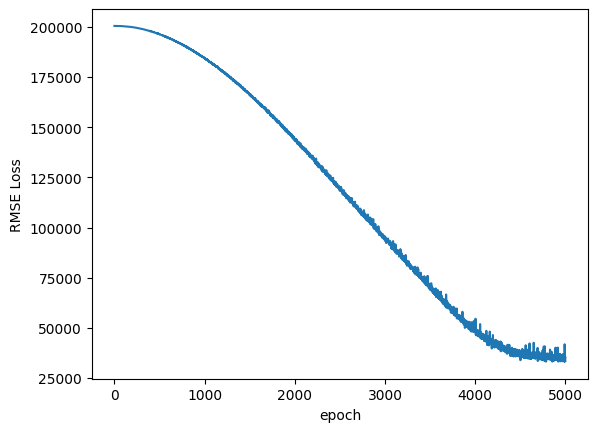

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs),[loss.detach().numpy() for loss in final_losses]) # Convert loss tensors to NumPy arrays using detach().numpy()
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [43]:
#Validate the Test Data
y_pred=""
with torch.no_grad():
  y_pred=model(test_categorical,test_cont)
  loss=torch.sqrt(loss_fn(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 51232.6875


In [44]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [45]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [46]:
data_predicted

,Prediction
0,155282.593750
1,192673.250000
2,149456.484375
3,213741.375000
4,218447.718750
5,203868.421875
6,149698.187500
7,297294.531250
8,153250.453125
9,379214.406250


In [47]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,155282.593750,-25282.593750
1,138887.0,192673.250000,-53786.250000
2,175500.0,149456.484375,26043.515625
3,195000.0,213741.375000,-18741.375000
4,142500.0,218447.718750,-75947.718750
